# Kernel

In this session, we consider nonparametric methods for regression and classification. Such methods do not assume a fixed parametric form for the prediction function, but instead try to estimate the function itself (rather than the parameters) directly from data. The key idea is that we observe the function value at a fixed set of $N$ points, namely $y_n=f\left(\boldsymbol{x}_n\right)$ for $n=1: N$, where $f$ is the unknown function, so to predict the function value at a new point, say $\boldsymbol{x}_*$, we just have to compare how "similar" $\boldsymbol{x}_*$ is to each of the $N$ training points, $\left\{\boldsymbol{x}_n\right\}$, and then we can predict that $f\left(\boldsymbol{x}_*\right)$ is some weighted combination of the $\left\{f\left(\boldsymbol{x}_n\right)\right\}$ values. Thus we may need to "remember" the entire training set, $\mathcal{D}=\left\{\left(\boldsymbol{x}_n, y_n\right)\right\}$, in order to make predictions at test time — we cannot "compress" $\mathcal{D}$ into a fixed-sized parameter vector.

The weights that are used for prediction are determined by the similarity between $\boldsymbol{x}_*$ and each $\boldsymbol{x}_n$, which is computed using a special kind of function known as kernel function.$\boldsymbol{\mu}_n$.

In [1]:
import numpy as np
import pandas as pd
from sklearn import datasets
import matplotlib.pyplot as plt

In [10]:
x = np.array([1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100]).reshape(-1,1)
y = [3,   5,   7,   9,  11,  13,  15,  17,  19,  21,  23,  25,
        27,  29,  31,  33,  35,  37,  39,  41,  43,  45,  47,  49,  51,
        53,  55,  57,  59,  61,  63,  65,  67,  69,  71,  73,  75,  77,
        79,  81,  83,  85,  87,  89,  91,  93,  95,  97,  99, 101, 103,
       105, 107, 109, 111, 113, 115, 117, 119, 121, 123, 125, 127, 129,
       131, 133, 135, 137, 139, 141, 143, 145, 147, 149, 151, 153, 155,
       157, 159, 161, 163, 165, 167, 169, 171, 173, 175, 177, 179, 181,
       183, 185, 187, 189, 191, 193, 195, 197, 199, 201]

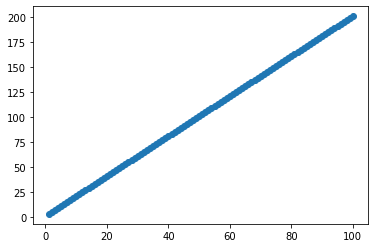

In [3]:
plt.scatter(x , y)

In [4]:
from sklearn.kernel_ridge import KernelRidge
from sklearn.linear_model import LinearRegression

# comparing the number of parameter in model with kernel and model without kernel

In [5]:
model = LinearRegression()
model.fit(x , y)

LinearRegression()

In [6]:
model.coef_

array([2.])

In [7]:
model = KernelRidge(kernel='rbf')
model.fit(x , y)

KernelRidge(kernel='rbf')

In [8]:
model.dual_coef_

array([ 1.14658138,  1.79454338,  2.52574303,  3.24588419,  3.96735559,
        4.68867542,  5.41001196,  6.13134669,  6.85268162,  7.57401652,
        8.29535143,  9.01668634,  9.73802124, 10.45935615, 11.18069106,
       11.90202596, 12.62336087, 13.34469578, 14.06603068, 14.78736559,
       15.5087005 , 16.23003541, 16.95137031, 17.67270522, 18.39404013,
       19.11537503, 19.83670994, 20.55804485, 21.27937975, 22.00071466,
       22.72204957, 23.44338447, 24.16471938, 24.88605429, 25.60738919,
       26.3287241 , 27.05005901, 27.77139392, 28.49272882, 29.21406373,
       29.93539864, 30.65673354, 31.37806845, 32.09940336, 32.82073826,
       33.54207317, 34.26340808, 34.98474298, 35.70607789, 36.4274128 ,
       37.14874771, 37.87008261, 38.59141752, 39.31275243, 40.03408733,
       40.75542224, 41.47675715, 42.19809205, 42.91942696, 43.64076187,
       44.36209677, 45.08343168, 45.80476659, 46.52610149, 47.2474364 ,
       47.96877131, 48.69010622, 49.41144112, 50.13277603, 50.85

In [9]:
# number of parameter
len(model.dual_coef_)

100

let us define the Gram matrix as the following $N \times N$ similarity matrix:
$$
\mathbf{K}=\left(\begin{array}{ccc}
\mathcal{K}\left(\boldsymbol{x}_1, \boldsymbol{x}_1\right) & \cdots & \mathcal{K}\left(\boldsymbol{x}_1, \boldsymbol{x}_N\right) \\
& \vdots & \\
\mathcal{K}\left(\boldsymbol{x}_N, \boldsymbol{x}_1\right) & \cdots & \mathcal{K}\left(\boldsymbol{x}_N, \boldsymbol{x}_N\right)
\end{array}\right)
$$
We say that $\mathcal{K}$ is a Mercer kernel iff the Gram matrix is positive definite for any set of (distinct) inputs $\left\{\boldsymbol{x}_i\right\}_{i=1}^N$.

# Gaussian kernel


\begin{equation}
K\left(\boldsymbol{x}^t, \boldsymbol{x}\right)=\exp \left(-\frac{\left\|x^t-x\right\|^2}{2 \sigma^2}\right)
\end{equation}

In [25]:
def Gaussian_Kernel(X  , sigma = 6):
    m = X.shape[0]
    Gram_Matrix = np.zeros(shape=(m , m))
    for i in range(m):
        for j in range(m):
            Gram_Matrix[i,j] = Gaussian(X[i].T , X[j].T,sigma)
    return Gram_Matrix
# --------------------------------------------
def Gaussian(x,z,sigma):
    x = np.exp((-(np.linalg.norm(x-z)**2)) / (2*sigma**2))
    return x

# Polynomial Kernels


\begin{equation}
K\left(x^t, x\right)=\left(x^T x^t\right)^q
\end{equation}

In [12]:
def Polynomial_Kernel(X , q = 2):
    m = X.shape[0]
    Gram_Matrix=np.zeros(shape=(m , m))
    for i in range(m):
        for j in range(m):
            Gram_Matrix[i,j] = Polynomial(X[i].T , X[j].T , q)
    return Gram_Matrix

# --------------------------------------------
def Polynomial(X, Y , q):
    return np.power(np.dot(X, Y), q)

# PCA

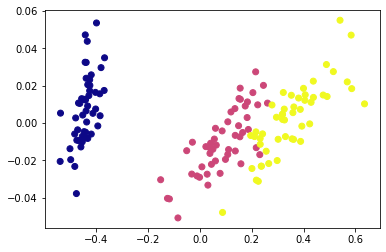

In [13]:
import numpy as np
import pandas as pd
from sklearn import datasets
import matplotlib.pyplot as plt
# -----------------------------------------------
def PCA(X , a):
    n = len(X)
    mean = np.mean(X, axis=0)
    X = X - mean
    X = X @ X.T / n
    
    eigenvalues, eigenvectors = np.linalg.eigh(X) #compute eigenvalues and eigenvectors

    sorted_idx = np.argsort(eigenvalues)[::-1]
    sorted_eigenvalues = eigenvalues[sorted_idx]
    sorted_eigenvectors = eigenvectors[:, sorted_idx] 

    landa = [sorted_eigenvalues[i] / n for i in range(n)] # compute variance for each component    
    for i in range(n):
        if (sum(landa[:i] / sum(landa))) >= a:
            d = i
            break
    return np.dot(X , sorted_eigenvectors[: , :d]) 
# -----------------------------------------------      
def draw(x , y):
    plt.scatter(x[:,:1] , x[:,1:] , c = y , cmap= "plasma")
    plt.show()
# -----------------------------------------------
def main():
    data = datasets.load_iris()
    x = data.data
    y = data.target
    p = PCA(x , 0.95)
    draw(p , y)
# -----------------------------------------------   
if __name__ == "__main__":
    main()

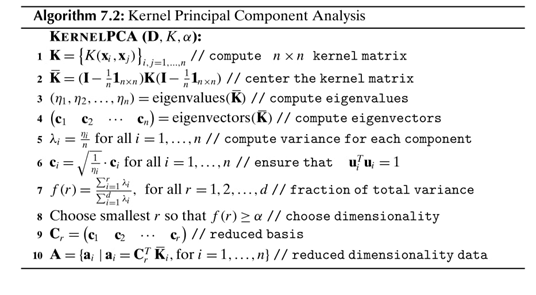

# KPCA

In [20]:
from numpy import identity as I
from numpy import ones

In [21]:
def KPCA(D , K , a):
    n = len(D)
    k = K(D)
    
    k_h = (I(n) - 1/n * ones((n , n))) @ k @ (I(n) - 1/n * ones((n , n)))

    eigenvalues, eigenvectors = np.linalg.eigh(k_h) #compute eigenvalues and eigenvectors


    sorted_idx = np.argsort(eigenvalues)[::-1]
    sorted_eigenvalues = eigenvalues[sorted_idx]
    sorted_eigenvectors = eigenvectors[:, sorted_idx] 

    landa = [sorted_eigenvalues[i] / n for i in range(n)] # compute variance for each component
    C = np.array([1/2*(1/sorted_eigenvalues[i]) * sorted_eigenvectors[i] for i in range(n)]) #  ensure that uT u = 1
    
    for i in range(n):
        if (sum(landa[:i] / sum(landa))) >= a:
            d = i
            break
    

    return np.dot(k , C[:,:d]) , landa


Example 7.8. Consider the nonlinear Iris data from Example 7.7 with $n=150$ points. Let us use the homogeneous quadratic polynomial kernel in Eq. (5.8):
$$
K\left(\mathbf{x}_i, \mathbf{x}_j\right)=\left(\mathbf{x}_i^T \mathbf{x}_j\right)^2
$$

In [22]:
data = datasets.load_iris()
x = data.data
y = data.target

# PCA with Polynomial kernel

In [23]:
p , landa = KPCA(x , Polynomial_Kernel , 0.95)
print(p.shape)
print(landa[0])
print(landa[1])
print(landa[2])

(150, 2)
748.512426440065
31.83172003425394
11.520010330160005


# PCA with Gaussian kernel

In [26]:
p , landa = KPCA(x , Gaussian_Kernel , 0.95)
print(p.shape)
print(landa[0])
print(landa[1])
print(landa[2])

(150, 3)
0.09694788318334825
0.008106892311497412
0.002567717773032358


# Compare PCA and KernelPCA Loss

In [27]:
# load Iris dataset
data = datasets.load_iris()
x = data.data
y = data.target

In [28]:
from sklearn.decomposition import PCA, KernelPCA

In [29]:
pca = PCA(n_components=2)
X_pca = pca.fit(x).transform(x)
X_pca_inverse = pca.inverse_transform(X_pca)

In [30]:
kernel_pca = KernelPCA(
    n_components=2, kernel="rbf", gamma=0.02, fit_inverse_transform=True, alpha=1e-10)
X_kernel_pca = kernel_pca.fit(x).transform(x)
X_kernel_pca_inverse = kernel_pca.inverse_transform(X_kernel_pca)

In [31]:
def compute_pca_loss(x , approx_x):
    return np.power(np.linalg.norm(x - approx_x) , 2)  / np.linalg.norm(x)

In [32]:
X_test_kernel_pca_inverse = kernel_pca.inverse_transform(X_kernel_pca)

In [33]:
compute_pca_loss(x , X_pca_inverse)

0.15567477275696517

In [34]:
compute_pca_loss(x , X_kernel_pca_inverse)

0.13304716974832914

In [35]:
# https://scikit-learn.org/stable/auto_examples/decomposition/plot_kernel_pca.html#sphx-glr-auto-examples-decomposition-plot-kernel-pca-py
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split

X, y = make_circles(n_samples=1_000, factor=0.3, noise=0.05, random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=0)

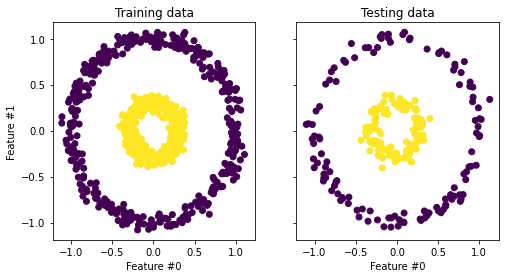

In [36]:
import matplotlib.pyplot as plt

_, (train_ax, test_ax) = plt.subplots(ncols=2, sharex=True, sharey=True, figsize=(8, 4))

train_ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train)
train_ax.set_ylabel("Feature #1")
train_ax.set_xlabel("Feature #0")
train_ax.set_title("Training data")

test_ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test)
test_ax.set_xlabel("Feature #0")
_ = test_ax.set_title("Testing data")

In [37]:
from sklearn.decomposition import PCA, KernelPCA

pca = PCA(n_components=2)
kernel_pca = KernelPCA(
    n_components=None, kernel="rbf", gamma=10, fit_inverse_transform=True, alpha=0.1)

X_test_pca = pca.fit(X_train).transform(X_test)
X_test_kernel_pca = kernel_pca.fit(X_train).transform(X_test)

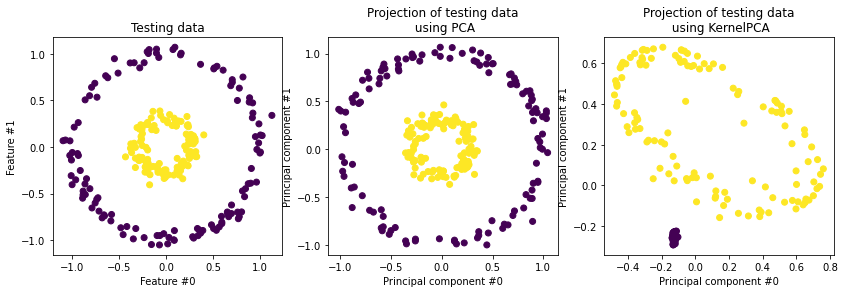

In [38]:
fig, (orig_data_ax, pca_proj_ax, kernel_pca_proj_ax) = plt.subplots(
    ncols=3, figsize=(14, 4))

orig_data_ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test)
orig_data_ax.set_ylabel("Feature #1")
orig_data_ax.set_xlabel("Feature #0")
orig_data_ax.set_title("Testing data")

pca_proj_ax.scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=y_test)
pca_proj_ax.set_ylabel("Principal component #1")
pca_proj_ax.set_xlabel("Principal component #0")
pca_proj_ax.set_title("Projection of testing data\n using PCA")

kernel_pca_proj_ax.scatter(X_test_kernel_pca[:, 0], X_test_kernel_pca[:, 1], c=y_test)
kernel_pca_proj_ax.set_ylabel("Principal component #1")
kernel_pca_proj_ax.set_xlabel("Principal component #0")
_ = kernel_pca_proj_ax.set_title("Projection of testing data\n using KernelPCA")